In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


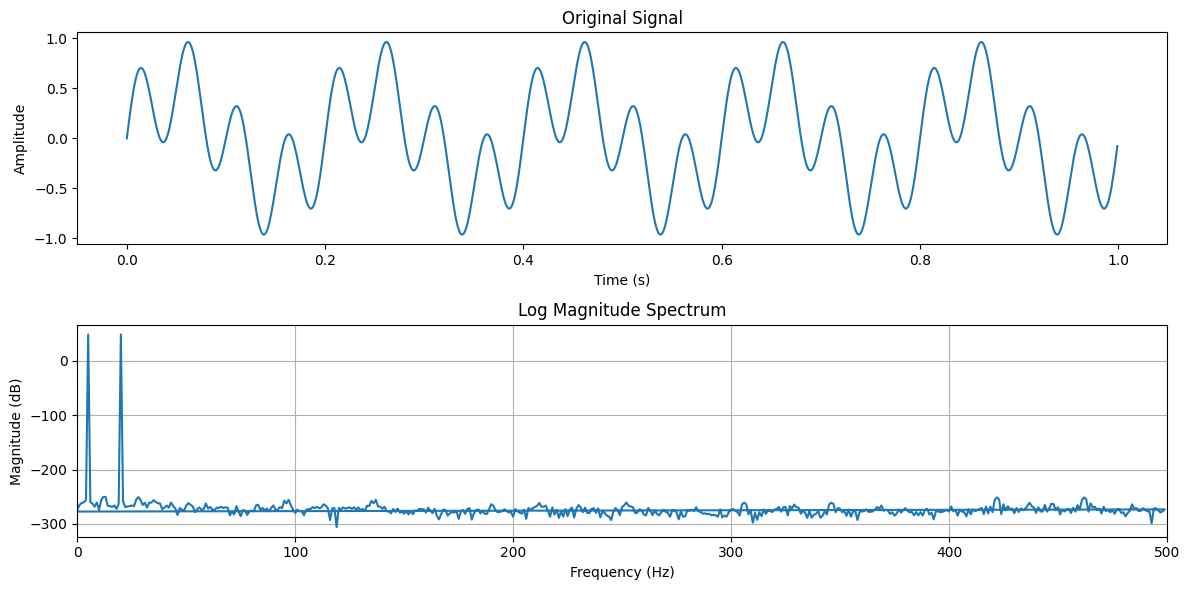

In [ ]:
# Some fundamentals of frequency domain filtering
# Read Gonzalez textbook for details

import numpy as np
import matplotlib.pyplot as plt

# Create a simple signal with two frequencies
fs = 1000  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # Time vector from 0 to 1 second
f1 = 5  # Frequency of the first sinusoidal component (Hz)
f2 = 20  # Frequency of the second sinusoidal component (Hz)
signal = 0.5 * np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Perform FFT to get the frequency spectrum
signal_fft = np.fft.fft(signal)
freq = np.fft.fftfreq(len(signal), 1/fs)

# Apply a log transform to the magnitude of the spectrum for visualization
magnitude_spectrum = np.abs(signal_fft)
log_magnitude_spectrum = 20 * np.log10(magnitude_spectrum)

# Plot the original signal
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the frequency spectrum (magnitude)
plt.subplot(212)
plt.plot(freq, log_magnitude_spectrum)
plt.title('Log Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.xlim(0, fs/2)  # Display only positive frequencies
plt.grid(True)

plt.tight_layout()
plt.show()


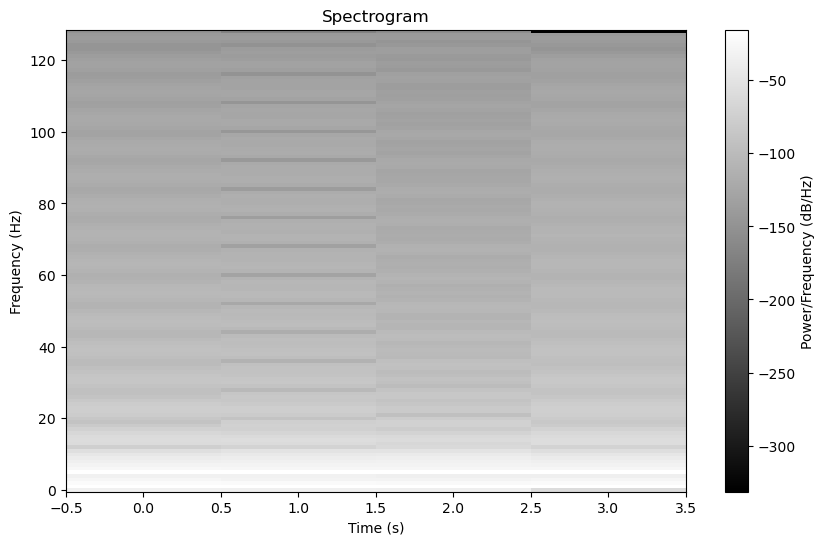

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Create a simple signal with two frequencies
fs = 1000  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # Time vector from 0 to 1 second
f1 = 5  # Frequency of the first sinusoidal component (Hz)
f2 = 20  # Frequency of the second sinusoidal component (Hz)
signal = 0.5 * np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Compute the spectrogram
frequencies, times, Sxx = spectrogram(signal, fs)

# Plot the spectrogram as an image
plt.figure(figsize=(10, 6))
plt.imshow(10 * np.log10(Sxx), aspect='auto', cmap='gray', origin='lower')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()


(-0.5, 627.5, 439.5, -0.5)

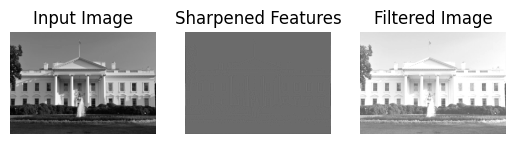

In [ ]:
# Image sharpening using Laplacian in frequency domain
import cv2
import numpy as np
import numpy.fft as n
import matplotlib.pyplot as plt

# Read image file
image = cv2.imread('/content/drive/MyDrive/Image for Image Processing/645947-whitehouse-pti.jpg',cv2.IMREAD_GRAYSCALE)

# Perform Fourier Transform
fft_image = n.fft2(image)

# fft_shift is necessary to centre the spectrum correctly
fft_shifted = n.fftshift(fft_image)

# Create Laplacian Filter
rows, cols = image.shape
u, v = np.meshgrid(np.arange(-cols // 2, cols // 2), np.arange(-rows // 2, rows // 2))

# Create the laplacian filter in Fourier (frequency) domain
laplacian_filter = 4 * np.pi**2 * (u**2 + v**2)

# Apply Laplacian Filter
filtered_image = fft_shifted * laplacian_filter

# Perform Inverse Fourier Transform
sharpened_image_l = n.ifft2(n.ifftshift(filtered_image)).real

# Normalize the sharpened image
sharpened_image_l = cv2.normalize(sharpened_image_l, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Add the Laplacian-filtered image to the original image
sharpened_image = cv2.add(image, sharpened_image_l)

plt.subplot(131)
plt.imshow(image, cmap = 'gray')
plt.title('Input Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(sharpened_image_l, cmap = 'gray')
plt.title('Sharpened Features')
plt.axis('off')

plt.subplot(133)
plt.imshow(sharpened_image, cmap = 'gray')
plt.title('Filtered Image')
plt.axis('off')

In [ ]:
# Assignment: Perform filtering in frequency domain with a low-pass butterworth filter
# defined as:
def butterworth_filter(shape, D, n):
    x, y = np.meshgrid(np.arange(-shape[1]/2, shape[1]/2), np.arange(-shape[0]/2, shape[0]/2))
    return 1 / (1 + (np.sqrt(x**2 + y**2) / D)**(2*n))



# You can use this definition or create a filter directly within the code.

In [ ]:
import cv2
import numpy as np
import numpy.fft as nf
import matplotlib.pyplot as plt

# Read image file
image = cv2.imread('/content/drive/MyDrive/Image for Image Processing/img_bgr.jpg',cv2.IMREAD_GRAYSCALE)

In [ ]:
# Create a low-pass Butterworth filter
D = 0.5  # Cutoff frequency
n = 2    # Filter order
filter_kernel = butterworth_filter(image.shape, D, n)
image_f = nf.fft2(image)
filter_f = nf.fft2(filter_kernel, s = image.shape)
conv_f = image_f * filter_f
smoothed_image = nf.ifft2(conv_f).real



(-0.5, 399.5, 266.5, -0.5)

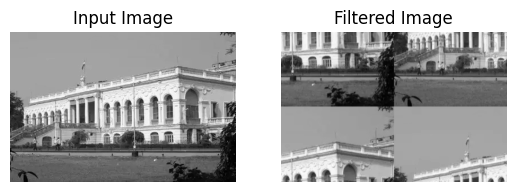

In [ ]:
plt.subplot(121)
plt.imshow(image, cmap = 'gray')
plt.title('Input Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(smoothed_image, cmap = 'gray')
plt.title('Filtered Image')
plt.axis('off')

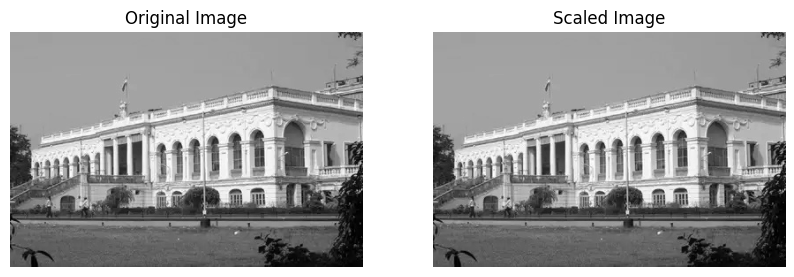

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('/content/drive/MyDrive/Image for Image Processing/img_bgr.jpg', cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale
#image_float32 = np.float32(image)

# Perform a 2D FFT on the image
image_fft = np.fft.fft2(image)
image_fft_shifted = np.fft.fftshift(image_fft)

# Scalar less than 1 to reduce magnitude
scalar = 0.001  # You can adjust this value to control the reduction

# Scale the magnitude of FFT coefficients
scaled_fft_shifted = image_fft_shifted * scalar

# Perform inverse FFT to obtain the modified image
scaled_image_fft = np.fft.ifftshift(scaled_fft_shifted)
scaled_image = np.abs(np.fft.ifft2(scaled_image_fft))

# Display the original and scaled images
plt.figure(figsize=(10, 6))
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(scaled_image, cmap='gray')
plt.title('Scaled Image'), plt.axis('off')
plt.show()
